# **Insurance Dataset**
___

In [8]:
source("core.r")

`summarise()` has grouped output by 'salud'. You can override using the
`.groups` argument.


### **Resumen**
En un trabajo anterior [], logramos ver con cierta aproximación, mediante gráficos tipo caja, de barras y estadísticos en tablas, cómo afectan las condiciones de obesidad, tabaquismo y la edad en los costos del seguro médico que tiene la población en la zona geográfica estudiada por una comparñia de seguros médicos. Los grupos poblacionales con tabaquismo y obesidad, tabaquismo o sin condiciones preexistentes pagan diferente abonos en función también de su edad. A continuación se muestra el gráfico que indica los porcentajes de los distintos grupos.

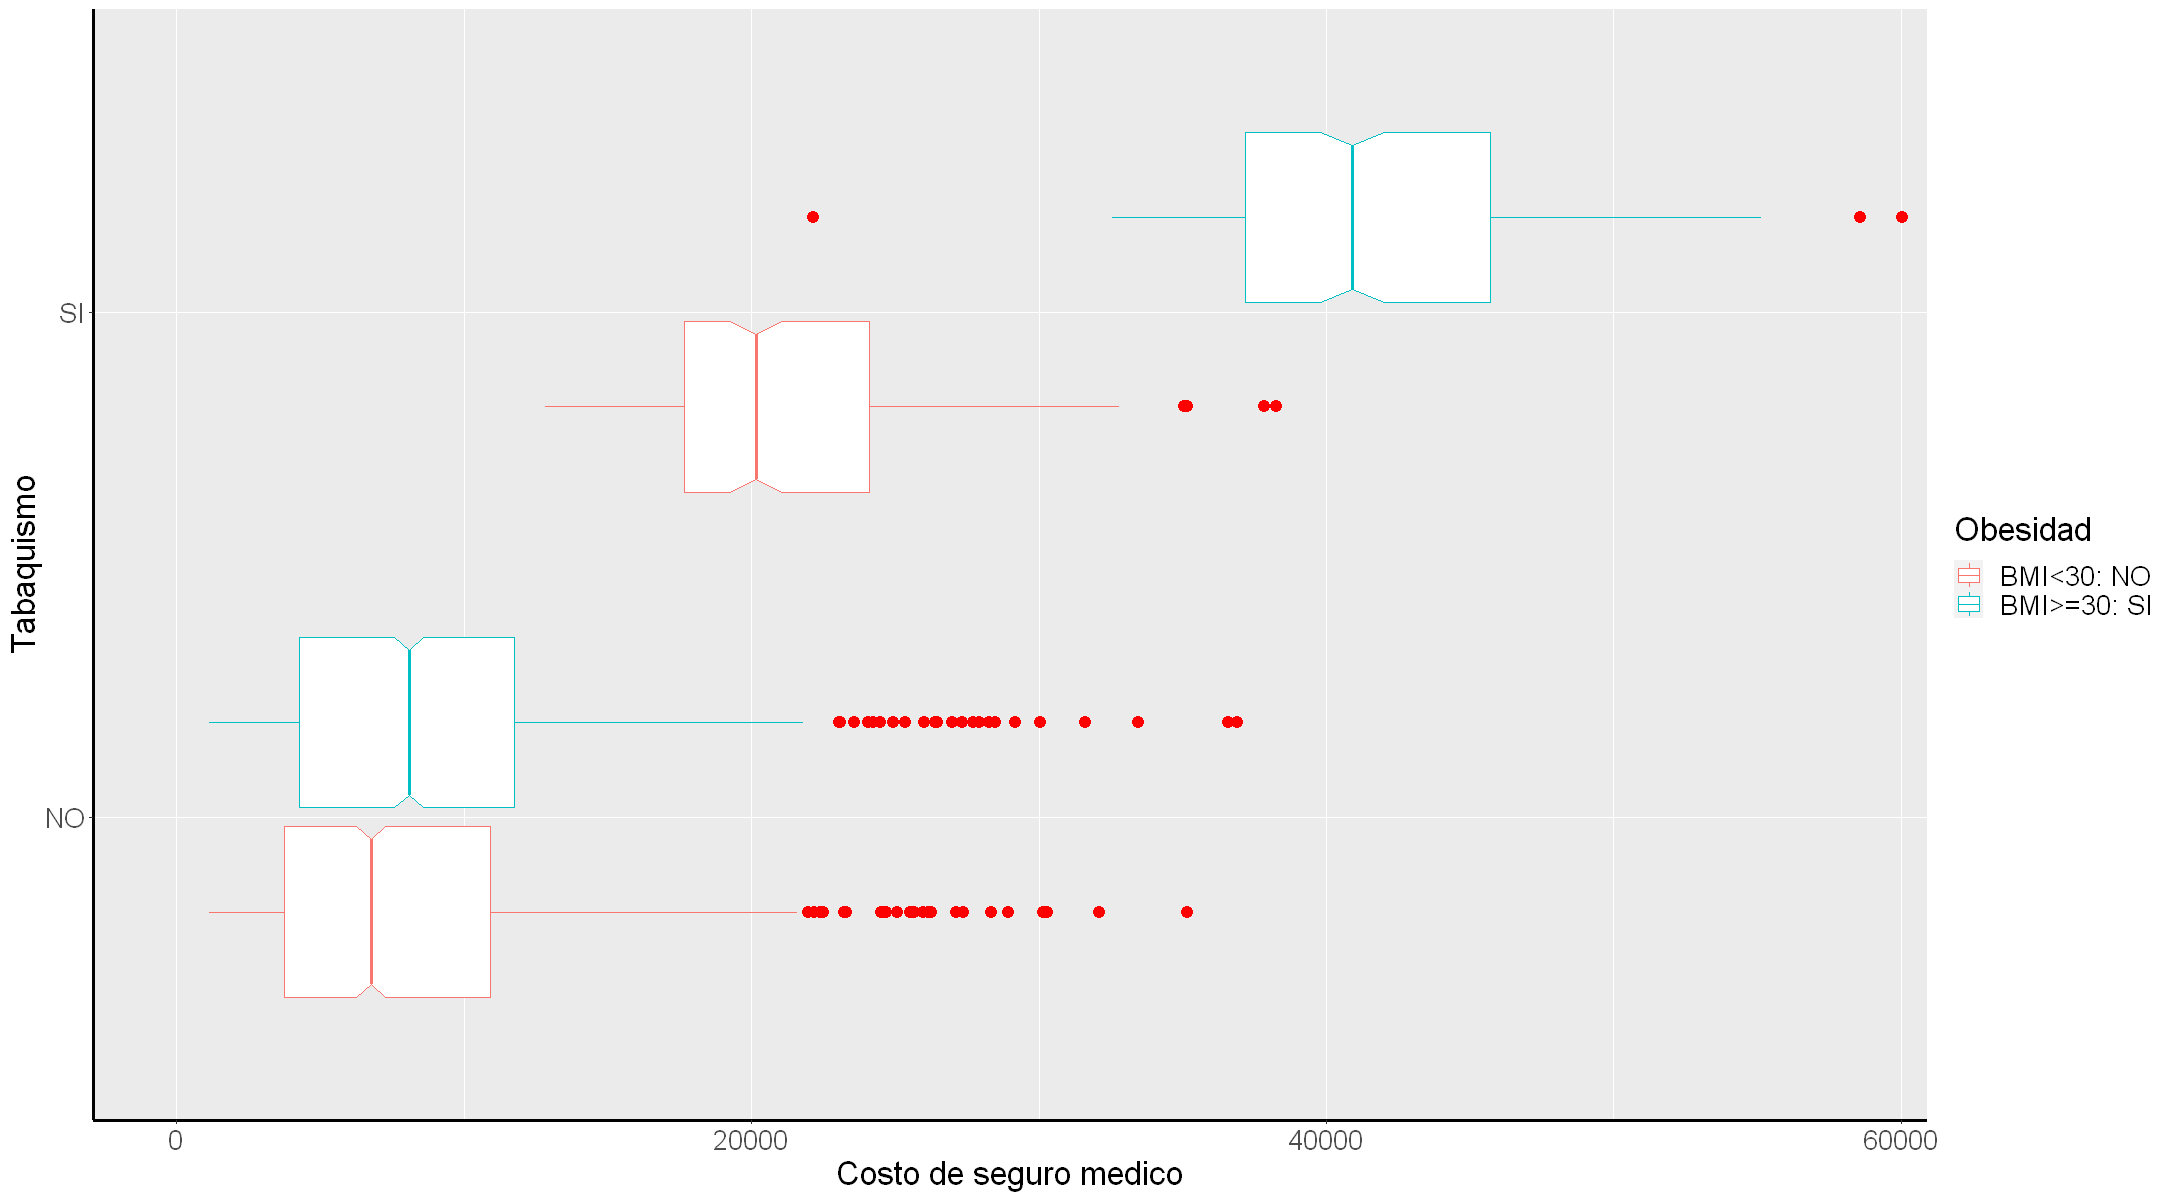

In [2]:
p1

##### ***Figura 1.*** Costo de seguro médico para 3 casos: personas con obesidad o tabaquismo, con tabaquismo y obesidad, sin condiciones preexistentes.

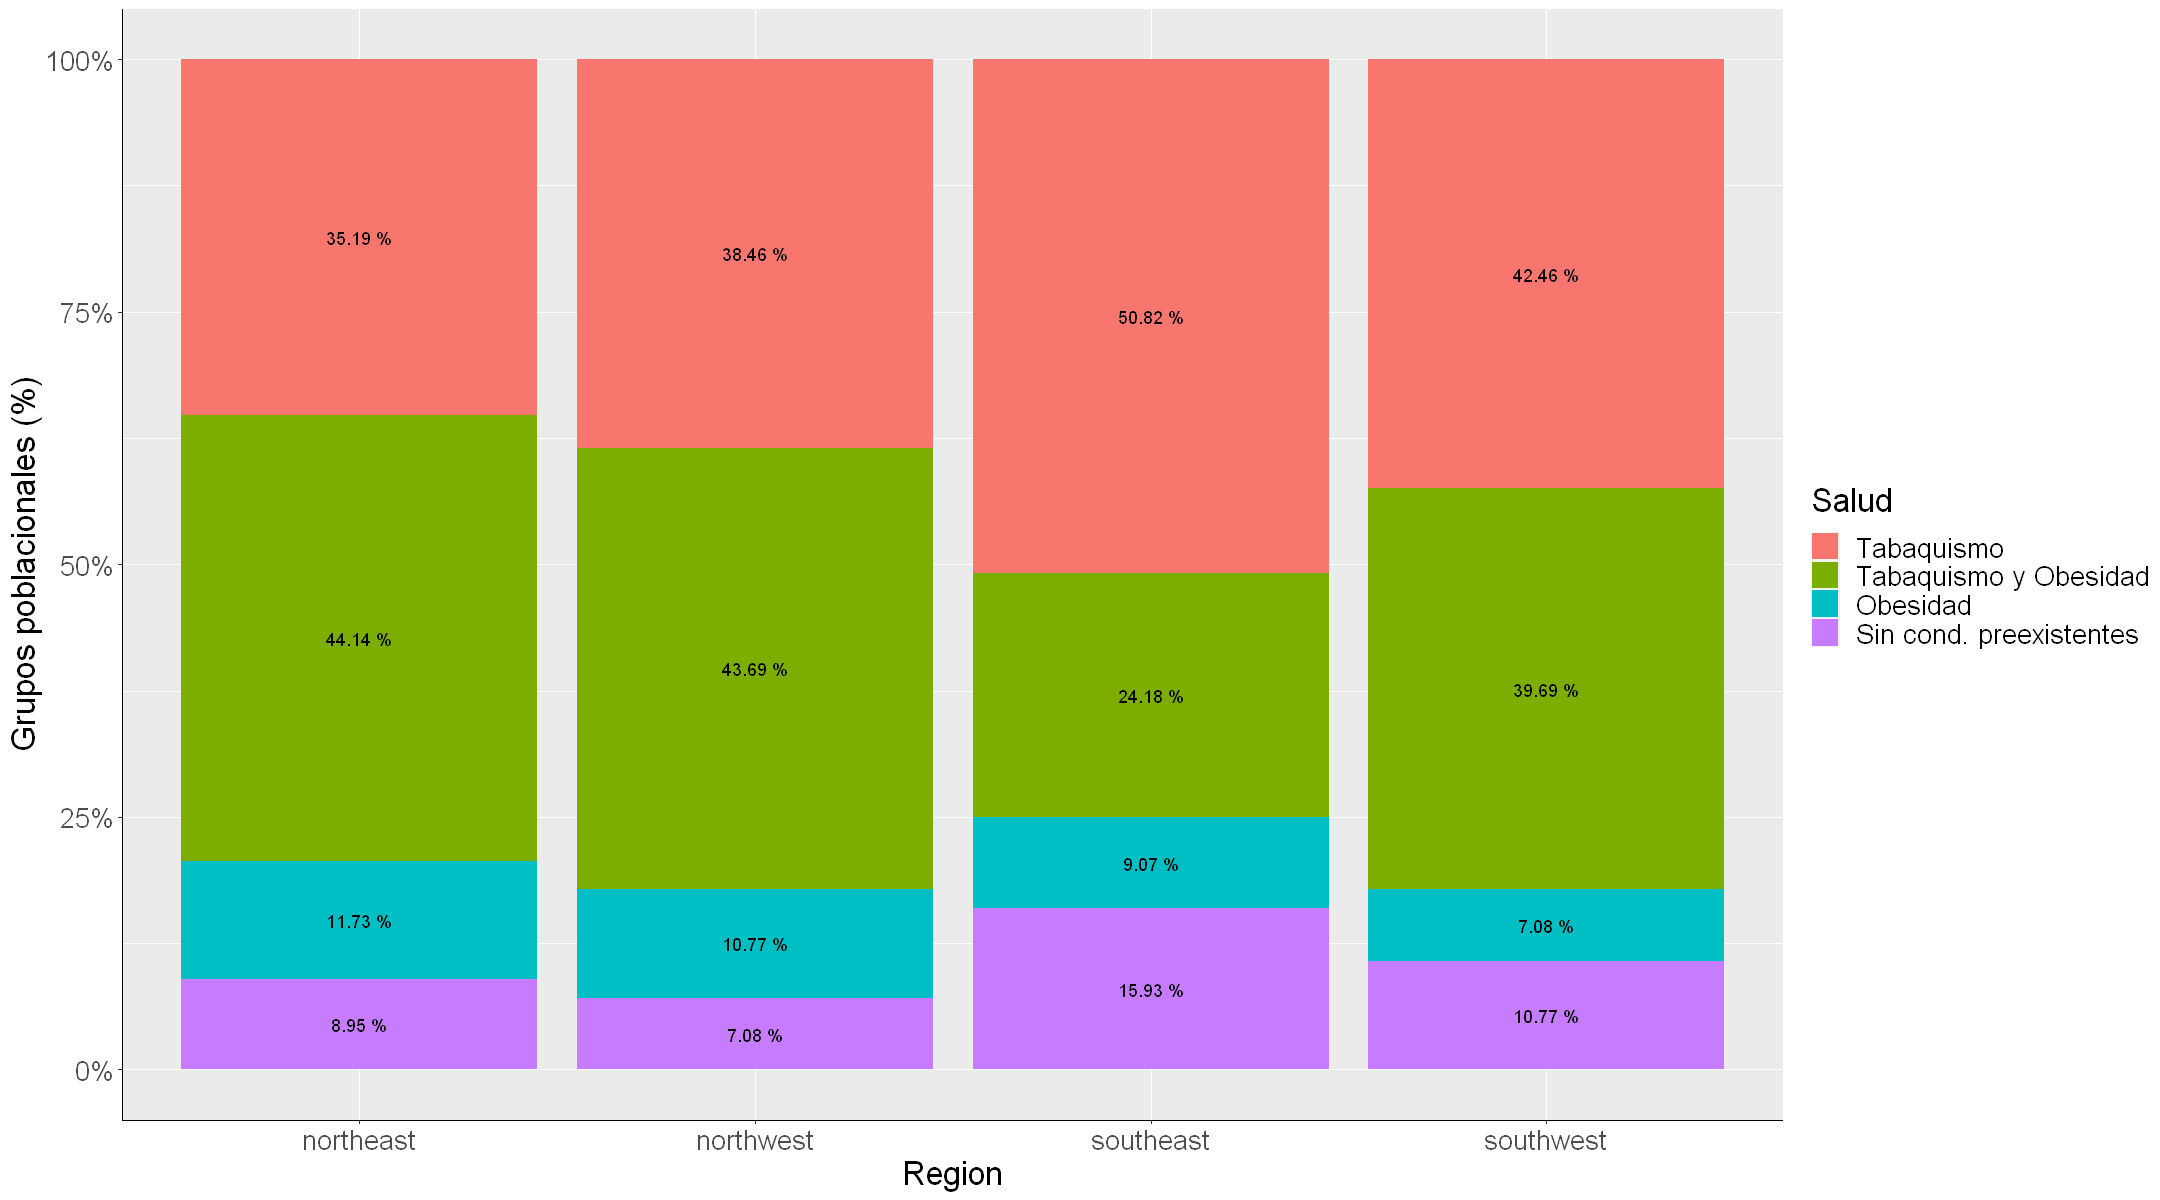

In [3]:
p2

##### ***Figura 2.*** "Porcentaje de tabaquismo, obesidad, tabaquismo y obesidad, o sin condiciones preexistentes en las poblaciones de las cuatro regiones estudiadas.

Luego, para tratar de entender cómo las variables actúan sobre los cargos de los clientes se prueba un modelo de regresión lineal considerando la edad, tabaquismo y obesidad. En la Fig. 3 se puede apreciar que la edad actua como pendiente en las rectas y se separan en 4, segun las condiciones posibles de obesidad y tabaquismo. Claramente no es el modelo adecuado.

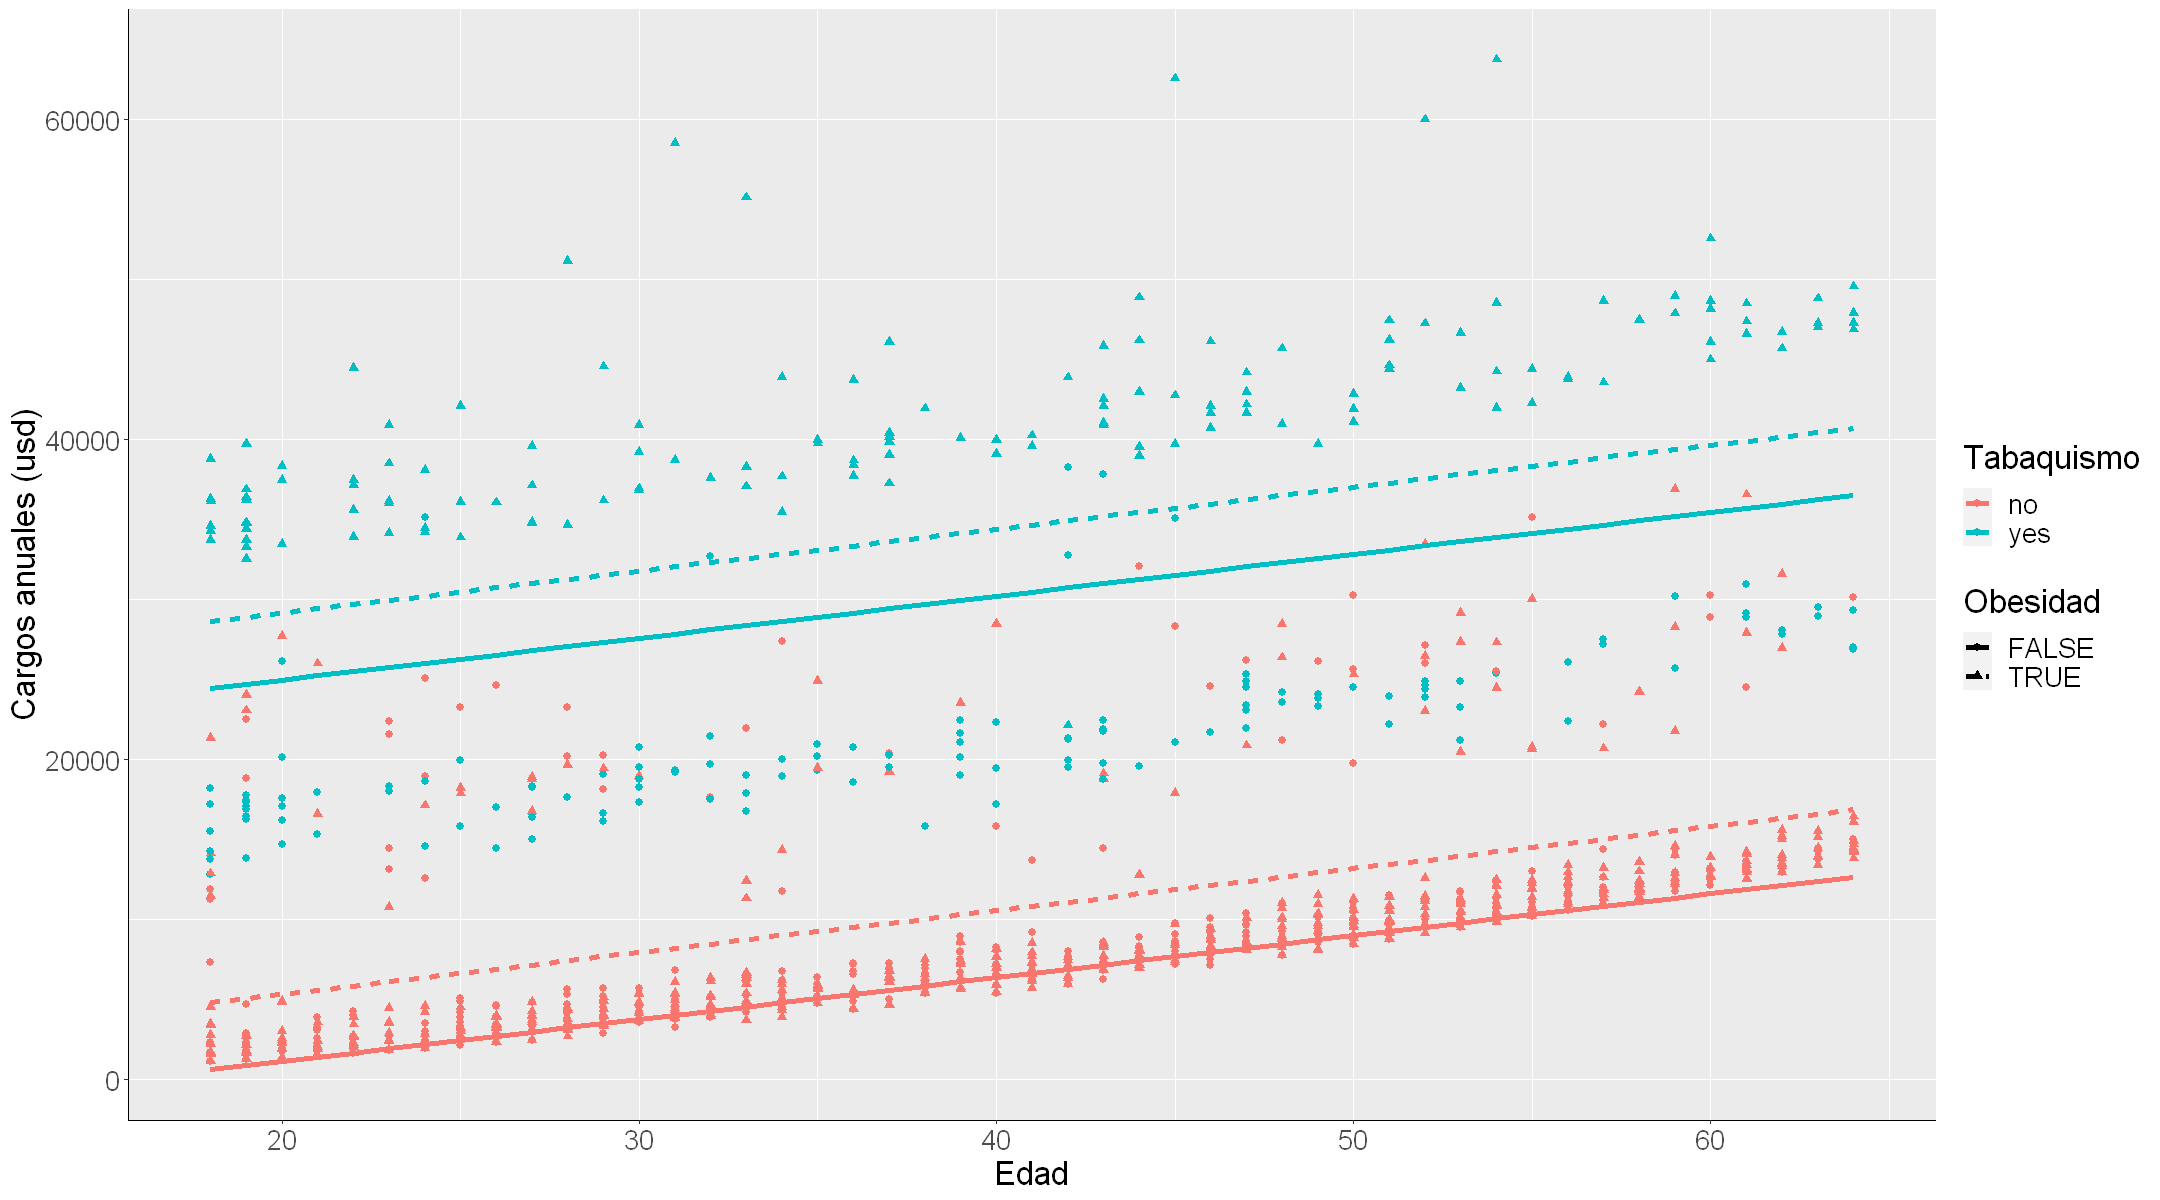

In [4]:
p3

##### ***Figura 3.*** Modelo de regresión lineal considerando las variables según el modelo: **cargos = edad + tabaquismo + obesidad**

In [5]:
summary(modelo_1)


Call:
lm(formula = charges ~ age + smoker + obesidad, data = df_seguros)

Residuals:
     Min       1Q   Median       3Q      Max 
-13876.6  -3631.9   -216.7   1459.9  26869.5 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -4102.39     517.69  -7.924  4.8e-15 ***
age            262.10      11.82  22.171  < 2e-16 ***
smokeryes    23839.98     409.93  58.157  < 2e-16 ***
obesidadTRUE  4191.34     332.50  12.606  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6049 on 1334 degrees of freedom
Multiple R-squared:  0.7511,	Adjusted R-squared:  0.7505 
F-statistic:  1342 on 3 and 1334 DF,  p-value: < 2.2e-16


Se puede ver claramente que hay tres grupos de acumulación de datos, en el grupo que paga menos hay principalmente no fumadores, obesos y no obesos; en el segund grupo aparecen fumadores y no fumadores mezclados con obesos y no obesos; y en el grupo que paga más, solo fumadores principalmente con obesos.
El error estándar para la edad no es demasiado elevado y el R^2 tampoco demasiado bajo, aún así p-value nos está indicando que no es el modelo adecuado.
Con lo cual, quizás un modelo que funcione mejor sería: "cargos = edad * tabaquismo + edad * obesidad + edad * obesidad * tabaquismo" así que probemos.

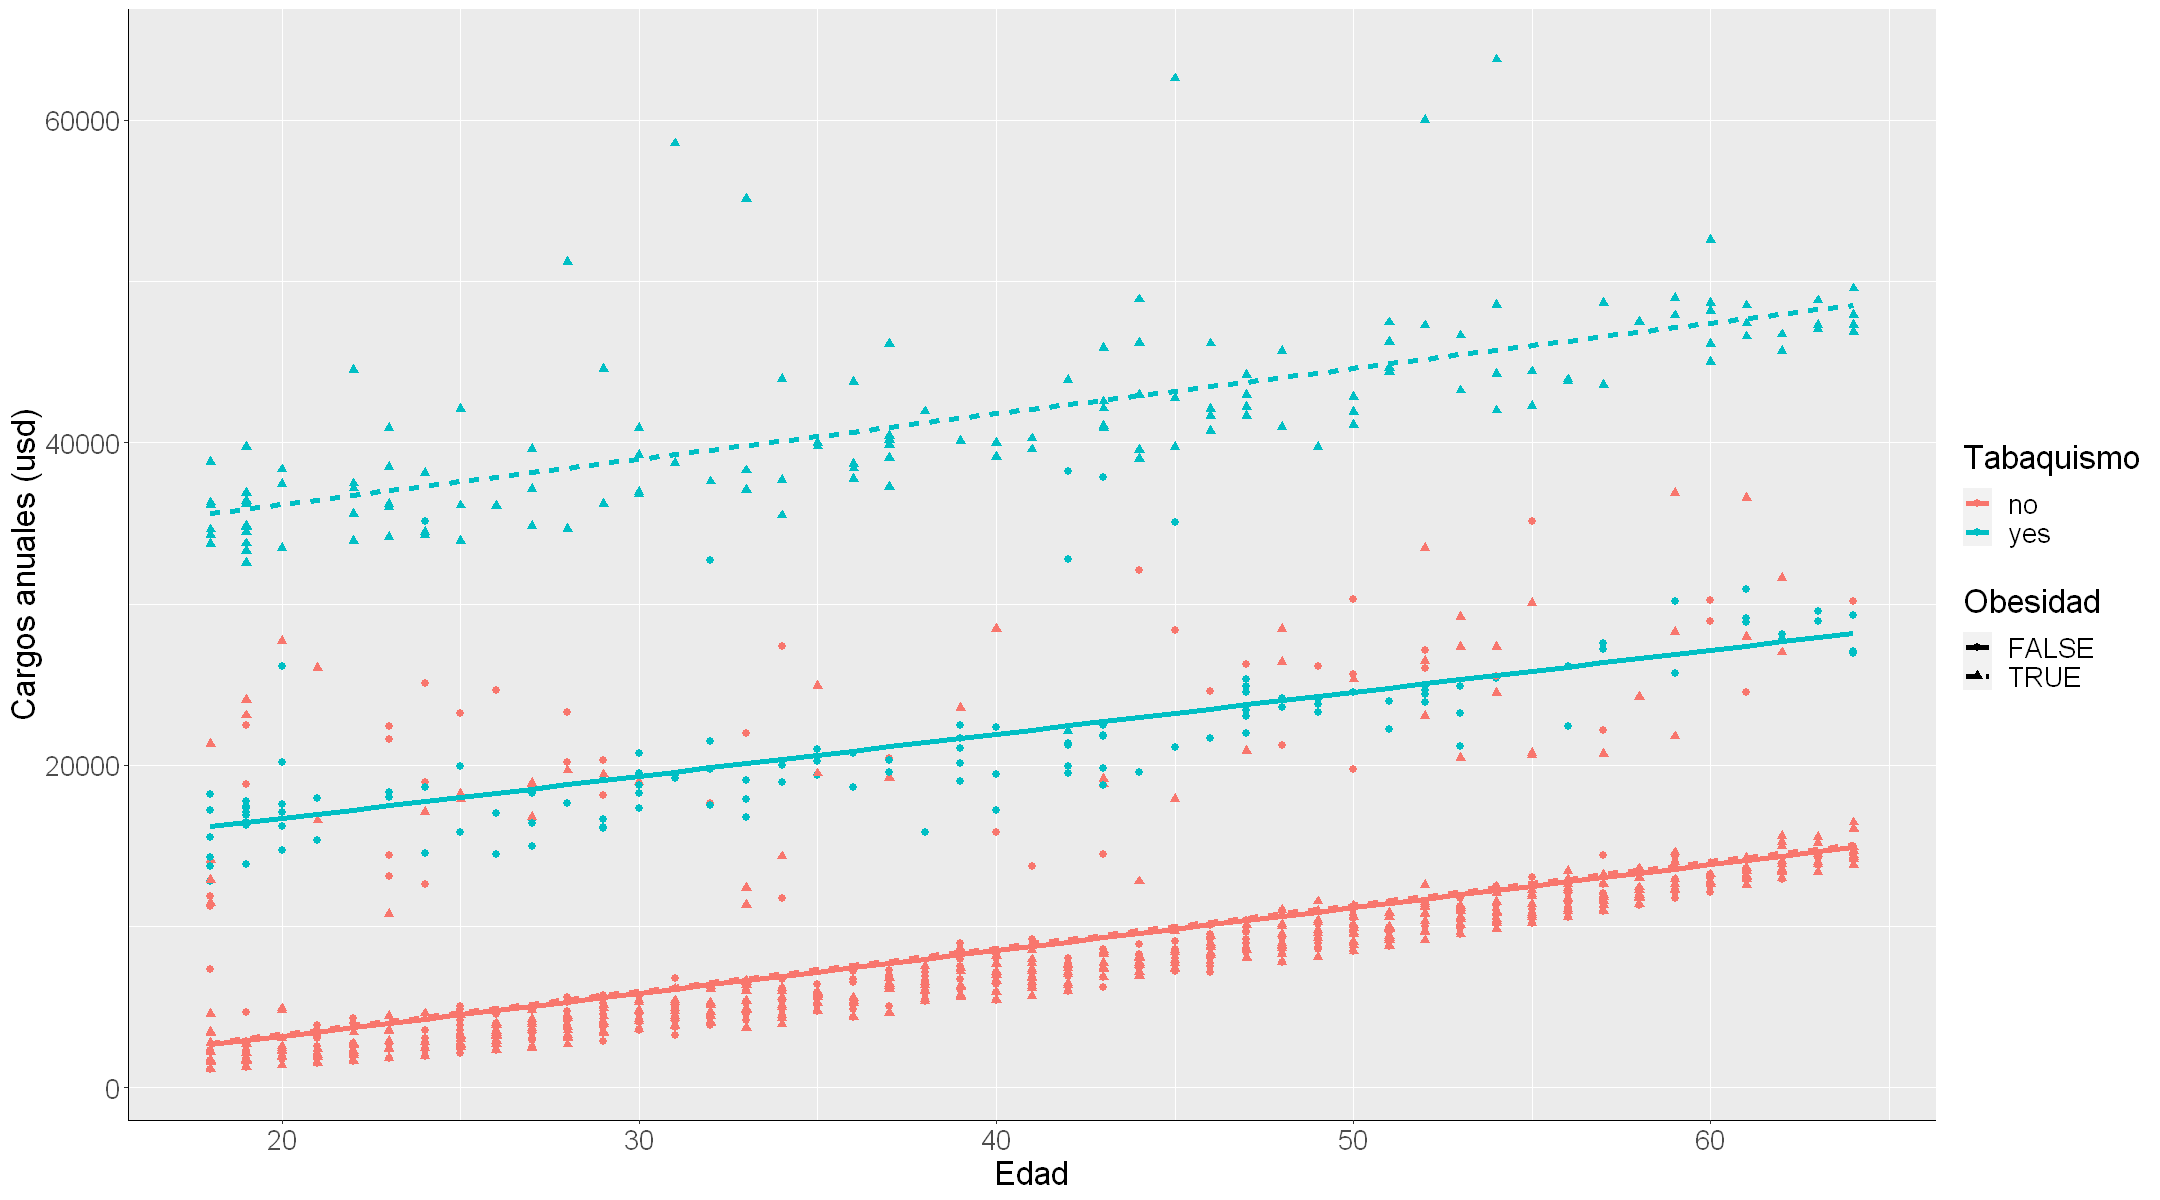

In [6]:
p4

##### ***Figura 4.*** Modelo de regresión lineal considerando las variables según el modelo: **cargos = edad * tabaquismo + edad * obesidad + edad * obesidad * tabaquismo**

In [7]:
summary(modelo_2)


Call:
lm(formula = charges ~ age * smoker + age * obesidad + age * 
    obesidad * smoker, data = df_seguros)

Residuals:
   Min     1Q Median     3Q    Max 
-20223  -1950  -1287   -401  24406 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -2118.374    605.785  -3.497 0.000486 ***
age                          265.947     15.028  17.697  < 2e-16 ***
smokeryes                  13621.731   1345.000  10.128  < 2e-16 ***
obesidadTRUE                  89.323    836.527   0.107 0.914981    
age:smokeryes                 -5.308     33.475  -0.159 0.874043    
age:obesidadTRUE               1.445     20.118   0.072 0.942743    
smokeryes:obesidadTRUE     18965.448   1835.093  10.335  < 2e-16 ***
age:smokeryes:obesidadTRUE    19.068     44.791   0.426 0.670391    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4566 on 1330 degrees of freedom
Multiple R-squared:  0.8586,	Adjusted R-squa

El modelo funciona mucho mejor, aunque pareciera no haber diferencias significativas en el grupo que menos paga entre no obesos y no fumadores, además de ajustar las rectas por encima de los datos con un grado de mayor error.
Por otro lado, el error estándar para la edad empeoró, el R^2 mejoró y p-value nos está indicando en algunos casos una mejora significativa, como: obesidadTRUE, age:smokeryes, age:obesidadTRUE y age:smokeryes:obesidadTRUE; aunque en el resto de los casos pareciera que no sigue no siendo el mejor modelo.
Esto último indica que el modelo debería tener algún factor de corrección adicional, que quedará para un próximo análisis.

#### made it by: <a id="5"></a> Pablo Peitsch <a href="https://github.com/PPeitsch">@PPeitsch</a>